# Imports

In [8]:
import os
import ipdb
import argparse
import numpy as np
import pandas as pd
import numpy.random as random
from sklearn.inspection import permutation_importance
import networkx as nx
from progressbar import ProgressBar
import matplotlib.pyplot as plt
import gzip
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import json
from utilitiesMe import flatten_dict
pd.options.display.max_columns = 9999999

## G5

In [9]:
data = []
relative_path = r"..\..\..\CombiningGTypeHistoryGraphs\Bipartite\MovieLens\movielens_5_injected_G5.json.gz"
with gzip.open(relative_path, 'rt', encoding='utf-16') as f:
    for line in f:
        data.append(json.loads(line))

In [10]:
data_flattened = []
for row in data:
    data_flattened.append(flatten_dict(row))
data_flattened[100] == flatten_dict(data[100])

True

In [11]:
## Convert flattened json to dataframe
dfG5 = pd.DataFrame.from_dict(data_flattened, orient='columns')
dfG5 = dfG5.add_prefix('G5_')

In [12]:
dfG5

G5_t        G5_u     G5_v  G5_is_fraud G5_history_type  \
0       874724710  bottom_255  top_259            0               G   
1       874724727  bottom_286  top_259            0               G   
2       874724754  bottom_298  top_259            0               G   
3       874724781  bottom_185  top_259            0               G   
4       874724843  bottom_173  top_259            0               G   
...           ...         ...      ...          ...             ...   
104995  893286638  bottom_313  top_729            0               G   
104996  893286638  bottom_328  top_729            0               G   
104997  893286638  bottom_333  top_729            0               G   
104998  893286638  bottom_689  top_729            0               G   
104999  893286638  bottom_748  top_729            0               G   

        G5_history_size  G5_bip  G5_cost  G5_top_number_of_nodes  \
0                     5    True      0.0                     NaN   
1                     5    True      0.0                     1.0   
2                     5    True      0.0                     1.0   
3                     5    True      0.0                     1.0   
4                     5    True      0.0                     1.0   
...                 ...     ...      ...                     ...   
104995                5    True      0.0                     6.0   
104996                5    True      0.0                     7.0   
104997                5    True      0.0                     8.0   
104998                5    True      0.0                     9.0   
104999                5    True      0.0                    10.0   

        G5_top_degrees_nb_one  G5_top_degrees_nb_two  G5_top_degrees_min  \
0                         NaN                    NaN                 NaN   
1                         1.0                    0.0                 1.0   
2                         1.0                    0.0                 1.0   
3                         1.0                    0.0                 1.0   
4                         1.0                    0.0                 1.0   
...                       ...                    ...                 ...   
104995                    6.0                    0.0                 1.0   
104996                    7.0                    0.0                 1.0   
104997                    8.0                    0.0                 1.0   
104998                    9.0                    0.0                 1.0   
104999                   10.0                    0.0                 1.0   

        G5_top_degrees_max  G5_top_degrees_median  \
0                      NaN                    NaN   
1                      1.0                    1.0   
2                      1.0                    1.0   
3                      1.0                    1.0   
4                      1.0                    1.0   
...                    ...                    ...   
104995                 1.0                    1.0   
104996                 1.0                    1.0   
104997                 1.0                    1.0   
104998                 1.0                    1.0   
104999                 1.0                    1.0   

        G5_top_weighted_degrees_nb_one  G5_top_weighted_degrees_nb_two  \
0                                  NaN                             NaN   
1                                  1.0                             0.0   
2                                  1.0                             0.0   
3                                  1.0                             0.0   
4                                  1.0                             0.0   
...                                ...                             ...   
104995                             6.0                             0.0   
104996                             7.0                             0.0   
104997                             8.0                             0.0   
104998                             9.0               

## G60

In [13]:
data = []
relative_path = r"..\..\..\CombiningGTypeHistoryGraphs\Bipartite\MovieLens\movielens_5_injected_G60.json.gz"
with gzip.open(relative_path, 'rt', encoding='utf-16') as f:
    for line in f:
        data.append(json.loads(line))

In [14]:
data_flattened = []
for row in data:
    data_flattened.append(flatten_dict(row))
data_flattened[100] == flatten_dict(data[100])

True

In [15]:
## Convert flattened json to dataframe
dfG60 = pd.DataFrame.from_dict(data_flattened, orient='columns')
dfG60 = dfG60.add_prefix('G60_')

In [16]:
dfG60

G60_t       G60_u    G60_v  G60_is_fraud G60_history_type  \
0       874724710  bottom_255  top_259             0                G   
1       874724727  bottom_286  top_259             0                G   
2       874724754  bottom_298  top_259             0                G   
3       874724781  bottom_185  top_259             0                G   
4       874724843  bottom_173  top_259             0                G   
...           ...         ...      ...           ...              ...   
104995  893286638  bottom_313  top_729             0                G   
104996  893286638  bottom_328  top_729             0                G   
104997  893286638  bottom_333  top_729             0                G   
104998  893286638  bottom_689  top_729             0                G   
104999  893286638  bottom_748  top_729             0                G   

        G60_history_size  G60_bip  G60_cost  G60_top_number_of_nodes  \
0                     60     True       0.0                      NaN   
1                     60     True       0.0                      NaN   
2                     60     True       0.0                      NaN   
3                     60     True       0.0                      3.0   
4                     60     True       0.0                      1.0   
...                  ...      ...       ...                      ...   
104995                60     True       0.0                      8.0   
104996                60     True       0.0                      9.0   
104997                60     True       0.0                     10.0   
104998                60     True       0.0                     11.0   
104999                60     True       0.0                     12.0   

        G60_top_degrees_nb_one  G60_top_degrees_nb_two  G60_top_degrees_min  \
0                          NaN                     NaN                  NaN   
1                          NaN                     NaN                  NaN   
2                          NaN                     NaN                  NaN   
3                          3.0                     0.0                  1.0   
4                          1.0                     0.0                  1.0   
...                        ...                     ...                  ...   
104995                     8.0                     0.0                  1.0   
104996                     9.0                     0.0                  1.0   
104997                    10.0                     0.0                  1.0   
104998                    11.0                     0.0                  1.0   
104999                    12.0                     0.0                  1.0   

        G60_top_degrees_max  G60_top_degrees_median  \
0                       NaN                     NaN   
1                       NaN                     NaN   
2                       NaN                     NaN   
3                       1.0                     1.0   
4                       1.0                     1.0   
...                     ...                     ...   
104995                  1.0                     1.0   
104996                  1.0                     1.0   
104997                  1.0                     1.0   
104998                  1.0                     1.0   
104999                  1.0                     1.0   

        G60_top_weighted_degrees_nb_one  G60_top_weighted_degrees_nb_two  \
0                                   NaN                              NaN   
1                                   NaN                              NaN   
2                                   NaN                              NaN   
3                                   3.0                              0.0   
4                                   1.0                              0.0   
...                                 ...                              ...   
104995                              8.0                              0.0   
104996                              9.0             

## G3600

In [17]:
data = []
relative_path = r"..\..\..\CombiningGTypeHistoryGraphs\Bipartite\MovieLens\movielens_5_injected_G3600.json.gz"
with gzip.open(relative_path, 'rt', encoding='utf-16') as f:
    for line in f:
        data.append(json.loads(line))

In [18]:
data_flattened = []
for row in data:
    data_flattened.append(flatten_dict(row))
data_flattened[100] == flatten_dict(data[100])

True

In [19]:
## Convert flattened json to dataframe
dfG3600 = pd.DataFrame.from_dict(data_flattened, orient='columns')
dfG3600 = dfG3600.add_prefix('G3600_')

In [20]:
dfG3600

G3600_t     G3600_u  G3600_v  G3600_is_fraud G3600_history_type  \
0       874724710  bottom_255  top_259               0                  G   
1       874724727  bottom_286  top_259               0                  G   
2       874724754  bottom_298  top_259               0                  G   
3       874724781  bottom_185  top_259               0                  G   
4       874724843  bottom_173  top_259               0                  G   
...           ...         ...      ...             ...                ...   
104995  893286638  bottom_313  top_729               0                  G   
104996  893286638  bottom_328  top_729               0                  G   
104997  893286638  bottom_333  top_729               0                  G   
104998  893286638  bottom_689  top_729               0                  G   
104999  893286638  bottom_748  top_729               0                  G   

        G3600_history_size  G3600_bip  G3600_cost  G3600_top_number_of_nodes  \
0                     3600       True         0.0                        NaN   
1                     3600       True         0.0                        NaN   
2                     3600       True         0.0                        NaN   
3                     3600       True         0.0                        NaN   
4                     3600       True         0.0                        NaN   
...                    ...        ...         ...                        ...   
104995                3600       True         0.0                       80.0   
104996                3600       True         0.0                       80.0   
104997                3600       True         0.0                       81.0   
104998                3600       True         0.0                       82.0   
104999                3600       True         0.0                       82.0   

        G3600_top_degrees_nb_one  G3600_top_degrees_nb_two  \
0                            NaN                       NaN   
1                            NaN                       NaN   
2                            NaN                       NaN   
3                            NaN                       NaN   
4                            NaN                       NaN   
...                          ...                       ...   
104995                      69.0                      11.0   
104996                      68.0                      12.0   
104997                      69.0                      12.0   
104998                      70.0                      12.0   
104999                      69.0                      13.0   

        G3600_top_degrees_min  G3600_top_degrees_max  \
0                         NaN                    NaN   
1                         NaN                    NaN   
2                         NaN                    NaN   
3                         NaN                    NaN   
4                         NaN                    NaN   
...                       ...                    ...   
104995                    1.0                    2.0   
104996                    1.0                    2.0   
104997                    1.0                    2.0   
104998                    1.0                    2.0   
104999                    1.0                    2.0   

        G3600_top_degrees_median  G3600_top_weighted_degrees_nb_one  \
0                            NaN                                NaN   
1                            NaN                                NaN   
2                            NaN                                NaN   
3                            NaN                                NaN   
4                            NaN                                NaN   
...                          ...                                ...   
104995                       1.0                               69.0   
104996                       1.0                               68.0   
104997                       1.0                               69.0

## G86400

In [21]:
data = []
relative_path = r"..\..\..\CombiningGTypeHistoryGraphs\Bipartite\MovieLens\movielens_5_injected_G86400.json.gz"
with gzip.open(relative_path, 'rt', encoding='utf-16') as f:
    for line in f:
        data.append(json.loads(line))

In [22]:
data_flattened = []
for row in data:
    data_flattened.append(flatten_dict(row))
data_flattened[100] == flatten_dict(data[100])

True

In [23]:
## Convert flattened json to dataframe
dfG86400 = pd.DataFrame.from_dict(data_flattened, orient='columns')
dfG86400 = dfG86400.add_prefix('G86400_')

In [24]:
dfG86400

G86400_t    G86400_u G86400_v  G86400_is_fraud G86400_history_type  \
0       874724710  bottom_255  top_259                0                   G   
1       874724727  bottom_286  top_259                0                   G   
2       874724754  bottom_298  top_259                0                   G   
3       874724781  bottom_185  top_259                0                   G   
4       874724843  bottom_173  top_259                0                   G   
...           ...         ...      ...              ...                 ...   
104995  893286638  bottom_313  top_729                0                   G   
104996  893286638  bottom_328  top_729                0                   G   
104997  893286638  bottom_333  top_729                0                   G   
104998  893286638  bottom_689  top_729                0                   G   
104999  893286638  bottom_748  top_729                0                   G   

        G86400_history_size  G86400_bip  G86400_cost  \
0                     86400        True          0.0   
1                     86400        True          0.0   
2                     86400        True          0.0   
3                     86400        True          0.0   
4                     86400        True          0.0   
...                     ...         ...          ...   
104995                86400        True          0.0   
104996                86400        True          0.0   
104997                86400        True          0.0   
104998                86400        True          0.0   
104999                86400        True          0.0   

        G86400_top_number_of_nodes  G86400_top_degrees_nb_one  \
0                              NaN                        NaN   
1                              NaN                        NaN   
2                              NaN                        NaN   
3                              NaN                        NaN   
4                              NaN                        NaN   
...                            ...                        ...   
104995                       419.0                      304.0   
104996                       419.0                      304.0   
104997                       419.0                      304.0   
104998                       420.0                      305.0   
104999                       420.0                      304.0   

        G86400_top_degrees_nb_two  G86400_top_degrees_min  \
0                             NaN                     NaN   
1                             NaN                     NaN   
2                             NaN                     NaN   
3                             NaN                     NaN   
4                             NaN                     NaN   
...                           ...                     ...   
104995                       95.0                     1.0   
104996                       95.0                     1.0   
104997                       94.0                     1.0   
104998                       94.0                     1.0   
104999                       95.0                     1.0   

        G86400_top_degrees_max  G86400_top_degrees_median  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
104995                     5.0                        1.0   
104996                     5.0                        1.0   
104997                     5.0                        1.0   
104998                     5.0                        1.0   
104999                     5.0                        1.0   

        G86400_top_weighted_degrees_nb_one  \
0                                      NaN   
1                                      NaN   
2 

## G259200

In [25]:
data = []
relative_path = r"..\..\..\CombiningGTypeHistoryGraphs\Bipartite\MovieLens\movielens_5_injected_G259200.json.gz"
with gzip.open(relative_path, 'rt', encoding='utf-16') as f:
    for line in f:
        data.append(json.loads(line))

In [26]:
data_flattened = []
for row in data:
    data_flattened.append(flatten_dict(row))
data_flattened[100] == flatten_dict(data[100])

True

In [27]:
## Convert flattened json to dataframe
dfG259200 = pd.DataFrame.from_dict(data_flattened, orient='columns')
dfG259200 = dfG259200.add_prefix('G259200_')

In [28]:
dfG259200

G259200_t   G259200_u G259200_v  G259200_is_fraud  \
0       874724710  bottom_255   top_259                 0   
1       874724727  bottom_286   top_259                 0   
2       874724754  bottom_298   top_259                 0   
3       874724781  bottom_185   top_259                 0   
4       874724843  bottom_173   top_259                 0   
...           ...         ...       ...               ...   
104995  893286638  bottom_313   top_729                 0   
104996  893286638  bottom_328   top_729                 0   
104997  893286638  bottom_333   top_729                 0   
104998  893286638  bottom_689   top_729                 0   
104999  893286638  bottom_748   top_729                 0   

       G259200_history_type  G259200_history_size  G259200_bip  G259200_cost  \
0                         G                259200         True           0.0   
1                         G                259200         True           0.0   
2                         G                259200         True           0.0   
3                         G                259200         True           0.0   
4                         G                259200         True           0.0   
...                     ...                   ...          ...           ...   
104995                    G                259200         True           0.0   
104996                    G                259200         True           0.0   
104997                    G                259200         True           0.0   
104998                    G                259200         True           0.0   
104999                    G                259200         True           0.0   

        G259200_top_number_of_nodes  G259200_top_degrees_nb_one  \
0                               NaN                         NaN   
1                               NaN                         NaN   
2                               NaN                         NaN   
3                               NaN                         NaN   
4                               NaN                         NaN   
...                             ...                         ...   
104995                        586.0                       373.0   
104996                        586.0                       373.0   
104997                        586.0                       373.0   
104998                        587.0                       374.0   
104999                        587.0                       373.0   

        G259200_top_degrees_nb_two  G259200_top_degrees_min  \
0                              NaN                      NaN   
1                              NaN                      NaN   
2                              NaN                      NaN   
3                              NaN                      NaN   
4                              NaN                      NaN   
...                            ...                      ...   
104995                       146.0                      1.0   
104996                       146.0                      1.0   
104997                       146.0                      1.0   
104998                       146.0                      1.0   
104999                       147.0                      1.0   

        G259200_top_degrees_max  G259200_top_degrees_median  \
0                           NaN                         NaN   
1                           NaN                         NaN   
2                           NaN                         NaN   
3                           NaN                         NaN   
4                           NaN                         NaN   
...                         ...                         ...   
104995                      7.0                         1.0   
104996                      7.0                         1.0   
104997                      7.0                         1.0   
104998                      7.0                         1.0   
104999                      7.0                         1.0

## G518400

In [29]:
data = []
relative_path = r"..\..\..\CombiningGTypeHistoryGraphs\Bipartite\MovieLens\movielens_5_injected_G518400.json.gz"
with gzip.open(relative_path, 'rt', encoding='utf-16') as f:
    for line in f:
        data.append(json.loads(line))

In [30]:
data_flattened = []
for row in data:
    data_flattened.append(flatten_dict(row))
data_flattened[100] == flatten_dict(data[100])

True

In [31]:
## Convert flattened json to dataframe
dfG518400 = pd.DataFrame.from_dict(data_flattened, orient='columns')
dfG518400 = dfG518400.add_prefix('G518400_')

In [32]:
dfG518400

G518400_t   G518400_u G518400_v  G518400_is_fraud  \
0       874724710  bottom_255   top_259                 0   
1       874724727  bottom_286   top_259                 0   
2       874724754  bottom_298   top_259                 0   
3       874724781  bottom_185   top_259                 0   
4       874724843  bottom_173   top_259                 0   
...           ...         ...       ...               ...   
104995  893286638  bottom_313   top_729                 0   
104996  893286638  bottom_328   top_729                 0   
104997  893286638  bottom_333   top_729                 0   
104998  893286638  bottom_689   top_729                 0   
104999  893286638  bottom_748   top_729                 0   

       G518400_history_type  G518400_history_size  G518400_bip  G518400_cost  \
0                         G                518400         True           0.0   
1                         G                518400         True           0.0   
2                         G                518400         True           0.0   
3                         G                518400         True           0.0   
4                         G                518400         True           0.0   
...                     ...                   ...          ...           ...   
104995                    G                518400         True           0.0   
104996                    G                518400         True           0.0   
104997                    G                518400         True           0.0   
104998                    G                518400         True           0.0   
104999                    G                518400         True           0.0   

        G518400_top_number_of_nodes  G518400_top_degrees_nb_one  \
0                               NaN                         NaN   
1                               NaN                         NaN   
2                               NaN                         NaN   
3                               NaN                         NaN   
4                               NaN                         NaN   
...                             ...                         ...   
104995                        880.0                       398.0   
104996                        880.0                       398.0   
104997                        880.0                       398.0   
104998                        880.0                       397.0   
104999                        880.0                       397.0   

        G518400_top_degrees_nb_two  G518400_top_degrees_min  \
0                              NaN                      NaN   
1                              NaN                      NaN   
2                              NaN                      NaN   
3                              NaN                      NaN   
4                              NaN                      NaN   
...                            ...                      ...   
104995                       201.0                      1.0   
104996                       201.0                      1.0   
104997                       201.0                      1.0   
104998                       202.0                      1.0   
104999                       202.0                      1.0   

        G518400_top_degrees_max  G518400_top_degrees_median  \
0                           NaN                         NaN   
1                           NaN                         NaN   
2                           NaN                         NaN   
3                           NaN                         NaN   
4                           NaN                         NaN   
...                         ...                         ...   
104995                     12.0                         2.0   
104996                     12.0                         2.0   
104997                     12.0                         2.0   
104998                     12.0                         2.0   
104999                     12.0                         2.0

## H5

In [33]:
relative_path = r"..\..\..\CombiningHTypeHistoryGraphs\Bipartite\MovieLens\movielens_5_injected_H5.json.gz"
data = []
with gzip.open(relative_path, 'rt', encoding='utf-16') as f:
    for line in f:
        data.append(json.loads(line))

In [34]:
# Flatten the internal `O(1)` features
data_flattened = []
for row in data:
    data_flattened.append(flatten_dict(row))
data_flattened[100] == flatten_dict(data[100])

True

In [35]:
## Convert flattened json to dataframe
dfH5 = pd.DataFrame.from_dict(data_flattened, orient='columns')
dfH5 = dfH5.add_prefix('H5_')

In [36]:
dfH5

H5_t        H5_u     H5_v  H5_is_fraud H5_history_type  \
0       874724710  bottom_255  top_259            0               H   
1       874724727  bottom_286  top_259            0               H   
2       874724754  bottom_298  top_259            0               H   
3       874724781  bottom_185  top_259            0               H   
4       874724843  bottom_173  top_259            0               H   
...           ...         ...      ...          ...             ...   
104995  893286638  bottom_313  top_729            0               H   
104996  893286638  bottom_328  top_729            0               H   
104997  893286638  bottom_333  top_729            0               H   
104998  893286638  bottom_689  top_729            0               H   
104999  893286638  bottom_748  top_729            0               H   

        H5_history_size  H5_bip  H5_cost  H5_top_number_of_nodes  \
0                     5    True      0.0                     NaN   
1                     5    True      0.0                     NaN   
2                     5    True      0.0                     NaN   
3                     5    True      0.0                     NaN   
4                     5    True      0.0                     NaN   
...                 ...     ...      ...                     ...   
104995                5    True      0.0                     5.0   
104996                5    True      0.0                     5.0   
104997                5    True      0.0                     5.0   
104998                5    True      0.0                     5.0   
104999                5    True      0.0                     5.0   

        H5_top_degrees_nb_one  H5_top_degrees_nb_two  H5_top_degrees_min  \
0                         NaN                    NaN                 NaN   
1                         NaN                    NaN                 NaN   
2                         NaN                    NaN                 NaN   
3                         NaN                    NaN                 NaN   
4                         NaN                    NaN                 NaN   
...                       ...                    ...                 ...   
104995                    5.0                    0.0                 1.0   
104996                    5.0                    0.0                 1.0   
104997                    5.0                    0.0                 1.0   
104998                    5.0                    0.0                 1.0   
104999                    5.0                    0.0                 1.0   

        H5_top_degrees_max  H5_top_degrees_median  \
0                      NaN                    NaN   
1                      NaN                    NaN   
2                      NaN                    NaN   
3                      NaN                    NaN   
4                      NaN                    NaN   
...                    ...                    ...   
104995                 1.0                    1.0   
104996                 1.0                    1.0   
104997                 1.0                    1.0   
104998                 1.0                    1.0   
104999                 1.0                    1.0   

        H5_top_weighted_degrees_nb_one  H5_top_weighted_degrees_nb_two  \
0                                  NaN                             NaN   
1                                  NaN                             NaN   
2                                  NaN                             NaN   
3                                  NaN                             NaN   
4                                  NaN                             NaN   
...                                ...                             ...   
104995                             5.0                             0.0   
104996                             5.0                             0.0   
104997                             5.0                             0.0   
104998                             5.0               

## H50

In [37]:
relative_path = r"..\..\..\CombiningHTypeHistoryGraphs\Bipartite\MovieLens\movielens_5_injected_H50.json.gz"
data = []
with gzip.open(relative_path, 'rt', encoding='utf-16') as f:
    for line in f:
        data.append(json.loads(line))

In [38]:
# Flatten the internal `O(1)` features
data_flattened = []
for row in data:
    data_flattened.append(flatten_dict(row))
data_flattened[100] == flatten_dict(data[100])

True

In [39]:
## Convert flattened json to dataframe
dfH50 = pd.DataFrame.from_dict(data_flattened, orient='columns')
dfH50 = dfH50.add_prefix('H50_')

In [40]:
dfH50

H50_t       H50_u    H50_v  H50_is_fraud H50_history_type  \
0       874724710  bottom_255  top_259             0                H   
1       874724727  bottom_286  top_259             0                H   
2       874724754  bottom_298  top_259             0                H   
3       874724781  bottom_185  top_259             0                H   
4       874724843  bottom_173  top_259             0                H   
...           ...         ...      ...           ...              ...   
104995  893286638  bottom_313  top_729             0                H   
104996  893286638  bottom_328  top_729             0                H   
104997  893286638  bottom_333  top_729             0                H   
104998  893286638  bottom_689  top_729             0                H   
104999  893286638  bottom_748  top_729             0                H   

        H50_history_size  H50_bip  H50_cost  H50_top_number_of_nodes  \
0                     50     True       0.0                      NaN   
1                     50     True       0.0                      NaN   
2                     50     True       0.0                      NaN   
3                     50     True       0.0                      NaN   
4                     50     True       0.0                      NaN   
...                  ...      ...       ...                      ...   
104995                50     True       0.0                     45.0   
104996                50     True       0.0                     45.0   
104997                50     True       0.0                     45.0   
104998                50     True       0.0                     45.0   
104999                50     True       0.0                     44.0   

        H50_top_degrees_nb_one  H50_top_degrees_nb_two  H50_top_degrees_min  \
0                          NaN                     NaN                  NaN   
1                          NaN                     NaN                  NaN   
2                          NaN                     NaN                  NaN   
3                          NaN                     NaN                  NaN   
4                          NaN                     NaN                  NaN   
...                        ...                     ...                  ...   
104995                    40.0                     5.0                  1.0   
104996                    40.0                     5.0                  1.0   
104997                    40.0                     5.0                  1.0   
104998                    40.0                     5.0                  1.0   
104999                    38.0                     6.0                  1.0   

        H50_top_degrees_max  H50_top_degrees_median  \
0                       NaN                     NaN   
1                       NaN                     NaN   
2                       NaN                     NaN   
3                       NaN                     NaN   
4                       NaN                     NaN   
...                     ...                     ...   
104995                  2.0                     1.0   
104996                  2.0                     1.0   
104997                  2.0                     1.0   
104998                  2.0                     1.0   
104999                  2.0                     1.0   

        H50_top_weighted_degrees_nb_one  H50_top_weighted_degrees_nb_two  \
0                                   NaN                              NaN   
1                                   NaN                              NaN   
2                                   NaN                              NaN   
3                                   NaN                              NaN   
4                                   NaN                              NaN   
...                                 ...                              ...   
104995                             40.0                              5.0   
104996                             40.0             

## H100

In [41]:
relative_path = r"..\..\..\CombiningHTypeHistoryGraphs\Bipartite\MovieLens\movielens_5_injected_H100.json.gz"
data = []
with gzip.open(relative_path, 'rt', encoding='utf-16') as f:
    for line in f:
        data.append(json.loads(line))

In [42]:
# Flatten the internal `O(1)` features
data_flattened = []
for row in data:
    data_flattened.append(flatten_dict(row))
data_flattened[100] == flatten_dict(data[100])

True

In [43]:
## Convert flattened json to dataframe
dfH100 = pd.DataFrame.from_dict(data_flattened, orient='columns')
dfH100 = dfH100.add_prefix('H100_')

In [44]:
dfH100

H100_t      H100_u   H100_v  H100_is_fraud H100_history_type  \
0       874724710  bottom_255  top_259              0                 H   
1       874724727  bottom_286  top_259              0                 H   
2       874724754  bottom_298  top_259              0                 H   
3       874724781  bottom_185  top_259              0                 H   
4       874724843  bottom_173  top_259              0                 H   
...           ...         ...      ...            ...               ...   
104995  893286638  bottom_313  top_729              0                 H   
104996  893286638  bottom_328  top_729              0                 H   
104997  893286638  bottom_333  top_729              0                 H   
104998  893286638  bottom_689  top_729              0                 H   
104999  893286638  bottom_748  top_729              0                 H   

        H100_history_size  H100_bip  H100_cost  H100_top_number_of_nodes  \
0                     100      True        0.0                       NaN   
1                     100      True        0.0                       NaN   
2                     100      True        0.0                       NaN   
3                     100      True        0.0                       NaN   
4                     100      True        0.0                       NaN   
...                   ...       ...        ...                       ...   
104995                100      True        0.0                      86.0   
104996                100      True        0.0                      86.0   
104997                100      True        0.0                      86.0   
104998                100      True        0.0                      87.0   
104999                100      True        0.0                      86.0   

        H100_top_degrees_nb_one  H100_top_degrees_nb_two  \
0                           NaN                      NaN   
1                           NaN                      NaN   
2                           NaN                      NaN   
3                           NaN                      NaN   
4                           NaN                      NaN   
...                         ...                      ...   
104995                     73.0                     12.0   
104996                     72.0                     14.0   
104997                     72.0                     14.0   
104998                     74.0                     13.0   
104999                     72.0                     14.0   

        H100_top_degrees_min  H100_top_degrees_max  H100_top_degrees_median  \
0                        NaN                   NaN                      NaN   
1                        NaN                   NaN                      NaN   
2                        NaN                   NaN                      NaN   
3                        NaN                   NaN                      NaN   
4                        NaN                   NaN                      NaN   
...                      ...                   ...                      ...   
104995                   1.0                   3.0                      1.0   
104996                   1.0                   2.0                      1.0   
104997                   1.0                   2.0                      1.0   
104998                   1.0                   2.0                      1.0   
104999                   1.0                   2.0                      1.0   

        H100_top_weighted_degrees_nb_one  H100_top_weighted_degrees_nb_two  \
0                                    NaN                               NaN   
1                                    NaN                               NaN   
2                                    NaN                               NaN   
3                                    NaN                               NaN   
4                                    NaN                               NaN   
...                                  ...                   

## H1000

In [45]:
data = []
relative_path = r"..\..\..\CombiningHTypeHistoryGraphs\Bipartite\MovieLens\movielens_5_injected_H1000.json.gz"
with gzip.open(relative_path, 'rt', encoding='utf-16') as f:
    for line in f:
        data.append(json.loads(line))

In [46]:
# Flatten the internal `O(1)` features
data_flattened = []
for row in data:
    data_flattened.append(flatten_dict(row))
data_flattened[100] == flatten_dict(data[100])

True

In [47]:
## Convert flattened json to dataframe
dfH1000 = pd.DataFrame.from_dict(data_flattened, orient='columns')
dfH1000 = dfH1000.add_prefix('H1000_')

In [48]:
dfH1000

H1000_t     H1000_u  H1000_v  H1000_is_fraud H1000_history_type  \
0       874724710  bottom_255  top_259               0                  H   
1       874724727  bottom_286  top_259               0                  H   
2       874724754  bottom_298  top_259               0                  H   
3       874724781  bottom_185  top_259               0                  H   
4       874724843  bottom_173  top_259               0                  H   
...           ...         ...      ...             ...                ...   
104995  893286638  bottom_313  top_729               0                  H   
104996  893286638  bottom_328  top_729               0                  H   
104997  893286638  bottom_333  top_729               0                  H   
104998  893286638  bottom_689  top_729               0                  H   
104999  893286638  bottom_748  top_729               0                  H   

        H1000_history_size  H1000_bip  H1000_cost  H1000_top_number_of_nodes  \
0                     1000       True         0.0                        NaN   
1                     1000       True         0.0                        NaN   
2                     1000       True         0.0                        NaN   
3                     1000       True         0.0                        NaN   
4                     1000       True         0.0                        NaN   
...                    ...        ...         ...                        ...   
104995                1000       True         0.0                      628.0   
104996                1000       True         0.0                      627.0   
104997                1000       True         0.0                      627.0   
104998                1000       True         0.0                      628.0   
104999                1000       True         0.0                      628.0   

        H1000_top_degrees_nb_one  H1000_top_degrees_nb_two  \
0                            NaN                       NaN   
1                            NaN                       NaN   
2                            NaN                       NaN   
3                            NaN                       NaN   
4                            NaN                       NaN   
...                          ...                       ...   
104995                     386.0                     148.0   
104996                     385.0                     148.0   
104997                     385.0                     148.0   
104998                     386.0                     148.0   
104999                     386.0                     147.0   

        H1000_top_degrees_min  H1000_top_degrees_max  \
0                         NaN                    NaN   
1                         NaN                    NaN   
2                         NaN                    NaN   
3                         NaN                    NaN   
4                         NaN                    NaN   
...                       ...                    ...   
104995                    1.0                    8.0   
104996                    1.0                    8.0   
104997                    1.0                    8.0   
104998                    1.0                    8.0   
104999                    1.0                    8.0   

        H1000_top_degrees_median  H1000_top_weighted_degrees_nb_one  \
0                            NaN                                NaN   
1                            NaN                                NaN   
2                            NaN                                NaN   
3                            NaN                                NaN   
4                            NaN                                NaN   
...                          ...                                ...   
104995                       1.0                              386.0   
104996                       1.0                              385.0   
104997                       1.0                              385.0

## H10000

In [49]:
data = []
relative_path = r"..\..\..\CombiningHTypeHistoryGraphs\Bipartite\MovieLens\movielens_5_injected_H10000.json.gz"
with gzip.open(relative_path, 'rt', encoding='utf-16') as f:
    for line in f:
        data.append(json.loads(line))

In [50]:
# Flatten the internal `O(1)` features
data_flattened = []
for row in data:
    data_flattened.append(flatten_dict(row))
data_flattened[100] == flatten_dict(data[100])

True

In [51]:
## Convert flattened json to dataframe
dfH10000 = pd.DataFrame.from_dict(data_flattened, orient='columns')
dfH10000 = dfH10000.add_prefix('H10000_')

In [52]:
dfH10000

H10000_t    H10000_u H10000_v  H10000_is_fraud H10000_history_type  \
0       874724710  bottom_255  top_259                0                   H   
1       874724727  bottom_286  top_259                0                   H   
2       874724754  bottom_298  top_259                0                   H   
3       874724781  bottom_185  top_259                0                   H   
4       874724843  bottom_173  top_259                0                   H   
...           ...         ...      ...              ...                 ...   
104995  893286638  bottom_313  top_729                0                   H   
104996  893286638  bottom_328  top_729                0                   H   
104997  893286638  bottom_333  top_729                0                   H   
104998  893286638  bottom_689  top_729                0                   H   
104999  893286638  bottom_748  top_729                0                   H   

        H10000_history_size  H10000_bip  H10000_cost  \
0                     10000        True          0.0   
1                     10000        True          0.0   
2                     10000        True          0.0   
3                     10000        True          0.0   
4                     10000        True          0.0   
...                     ...         ...          ...   
104995                10000        True          0.0   
104996                10000        True          0.0   
104997                10000        True          0.0   
104998                10000        True          0.0   
104999                10000        True          0.0   

        H10000_top_number_of_nodes  H10000_top_degrees_nb_one  \
0                              NaN                        NaN   
1                              NaN                        NaN   
2                              NaN                        NaN   
3                              NaN                        NaN   
4                              NaN                        NaN   
...                            ...                        ...   
104995                      1412.0                      275.0   
104996                      1412.0                      275.0   
104997                      1412.0                      275.0   
104998                      1412.0                      275.0   
104999                      1412.0                      276.0   

        H10000_top_degrees_nb_two  H10000_top_degrees_min  \
0                             NaN                     NaN   
1                             NaN                     NaN   
2                             NaN                     NaN   
3                             NaN                     NaN   
4                             NaN                     NaN   
...                           ...                     ...   
104995                      231.0                     1.0   
104996                      231.0                     1.0   
104997                      231.0                     1.0   
104998                      231.0                     1.0   
104999                      230.0                     1.0   

        H10000_top_degrees_max  H10000_top_degrees_median  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
104995                    64.0                        4.0   
104996                    64.0                        4.0   
104997                    64.0                        4.0   
104998                    64.0                        4.0   
104999                    64.0                        4.0   

        H10000_top_weighted_degrees_nb_one  \
0                                      NaN   
1                                      NaN   
2 

## H15000

In [55]:
data = []
relative_path = r"..\..\..\CombiningHTypeHistoryGraphs\Bipartite\MovieLens\movielens_5_injected_H15000.json.gz"
with gzip.open(relative_path, 'rt', encoding='utf-16') as f:
    for line in f:
        data.append(json.loads(line))

In [56]:
# Flatten the internal `O(1)` features
data_flattened = []
for row in data:
    data_flattened.append(flatten_dict(row))
data_flattened[100] == flatten_dict(data[100])

True

In [57]:
## Convert flattened json to dataframe
dfH15000 = pd.DataFrame.from_dict(data_flattened, orient='columns')
dfH15000 = dfH15000.add_prefix('H15000_')

In [58]:
dfH15000

H15000_t    H15000_u H15000_v  H15000_is_fraud H15000_history_type  \
0       874724710  bottom_255  top_259                0                   H   
1       874724727  bottom_286  top_259                0                   H   
2       874724754  bottom_298  top_259                0                   H   
3       874724781  bottom_185  top_259                0                   H   
4       874724843  bottom_173  top_259                0                   H   
...           ...         ...      ...              ...                 ...   
104995  893286638  bottom_313  top_729                0                   H   
104996  893286638  bottom_328  top_729                0                   H   
104997  893286638  bottom_333  top_729                0                   H   
104998  893286638  bottom_689  top_729                0                   H   
104999  893286638  bottom_748  top_729                0                   H   

        H15000_history_size  H15000_bip  H15000_cost  \
0                     15000        True          0.0   
1                     15000        True          0.0   
2                     15000        True          0.0   
3                     15000        True          0.0   
4                     15000        True          0.0   
...                     ...         ...          ...   
104995                15000        True          0.0   
104996                15000        True          0.0   
104997                15000        True          0.0   
104998                15000        True          0.0   
104999                15000        True          0.0   

        H15000_top_number_of_nodes  H15000_top_degrees_nb_one  \
0                              NaN                        NaN   
1                              NaN                        NaN   
2                              NaN                        NaN   
3                              NaN                        NaN   
4                              NaN                        NaN   
...                            ...                        ...   
104995                      1485.0                      252.0   
104996                      1485.0                      253.0   
104997                      1485.0                      253.0   
104998                      1485.0                      253.0   
104999                      1484.0                      252.0   

        H15000_top_degrees_nb_two  H15000_top_degrees_min  \
0                             NaN                     NaN   
1                             NaN                     NaN   
2                             NaN                     NaN   
3                             NaN                     NaN   
4                             NaN                     NaN   
...                           ...                     ...   
104995                      185.0                     1.0   
104996                      184.0                     1.0   
104997                      184.0                     1.0   
104998                      184.0                     1.0   
104999                      184.0                     1.0   

        H15000_top_degrees_max  H15000_top_degrees_median  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
104995                    93.0                        6.0   
104996                    93.0                        6.0   
104997                    93.0                        6.0   
104998                    93.0                        6.0   
104999                    93.0                        6.0   

        H15000_top_weighted_degrees_nb_one  \
0                                      NaN   
1                                      NaN   
2 

## Combining all the history graphs and dropping NaNs

In [59]:
df_all_history_graphs = pd.concat([dfG5, dfG60, dfG3600, dfG86400, dfG259200, dfG518400,
                                   dfH5, dfH50, dfH100, dfH1000, dfH10000, dfH15000], axis = 1)
df_all_history_graphs

G5_t        G5_u     G5_v  G5_is_fraud G5_history_type  \
0       874724710  bottom_255  top_259            0               G   
1       874724727  bottom_286  top_259            0               G   
2       874724754  bottom_298  top_259            0               G   
3       874724781  bottom_185  top_259            0               G   
4       874724843  bottom_173  top_259            0               G   
...           ...         ...      ...          ...             ...   
104995  893286638  bottom_313  top_729            0               G   
104996  893286638  bottom_328  top_729            0               G   
104997  893286638  bottom_333  top_729            0               G   
104998  893286638  bottom_689  top_729            0               G   
104999  893286638  bottom_748  top_729            0               G   

        G5_history_size  G5_bip  G5_cost  G5_top_number_of_nodes  \
0                     5    True      0.0                     NaN   
1                     5    True      0.0                     1.0   
2                     5    True      0.0                     1.0   
3                     5    True      0.0                     1.0   
4                     5    True      0.0                     1.0   
...                 ...     ...      ...                     ...   
104995                5    True      0.0                     6.0   
104996                5    True      0.0                     7.0   
104997                5    True      0.0                     8.0   
104998                5    True      0.0                     9.0   
104999                5    True      0.0                    10.0   

        G5_top_degrees_nb_one  G5_top_degrees_nb_two  G5_top_degrees_min  \
0                         NaN                    NaN                 NaN   
1                         1.0                    0.0                 1.0   
2                         1.0                    0.0                 1.0   
3                         1.0                    0.0                 1.0   
4                         1.0                    0.0                 1.0   
...                       ...                    ...                 ...   
104995                    6.0                    0.0                 1.0   
104996                    7.0                    0.0                 1.0   
104997                    8.0                    0.0                 1.0   
104998                    9.0                    0.0                 1.0   
104999                   10.0                    0.0                 1.0   

        G5_top_degrees_max  G5_top_degrees_median  \
0                      NaN                    NaN   
1                      1.0                    1.0   
2                      1.0                    1.0   
3                      1.0                    1.0   
4                      1.0                    1.0   
...                    ...                    ...   
104995                 1.0                    1.0   
104996                 1.0                    1.0   
104997                 1.0                    1.0   
104998                 1.0                    1.0   
104999                 1.0                    1.0   

        G5_top_weighted_degrees_nb_one  G5_top_weighted_degrees_nb_two  \
0                                  NaN                             NaN   
1                                  1.0                             0.0   
2                                  1.0                             0.0   
3                                  1.0                             0.0   
4                                  1.0                             0.0   
...                                ...                             ...   
104995                             6.0                             0.0   
104996                             7.0                             0.0   
104997                             8.0                             0.0   
104998                             9.0               

In [60]:
# Create a new DataFrame to preserve rows with NaN
nan_df = pd.DataFrame(columns=df_all_history_graphs.columns)

# Remove rows with NaN from 'df' and append them to 'nan_df'
nan_rows = df_all_history_graphs[df_all_history_graphs.isnull().any(axis=1)]
df_all_history_graphs = df_all_history_graphs.dropna()
nan_df = nan_df.append(nan_rows)

# Display the updated 'df' and 'nan_df'
print("Updated DataFrame without NaN:")
df_all_history_graphs

Updated DataFrame without NaN:


G5_t         G5_u     G5_v  G5_is_fraud G5_history_type  \
15000   877399746    bottom_64  top_391            0               G   
15001   877399746   bottom_963  top_391            0               G   
15002   877399780  bottom_1601  top_561            1               G   
15003   877399780   bottom_276  top_391            0               G   
15004   877399780     bottom_9  top_391            0               G   
...           ...          ...      ...          ...             ...   
104995  893286638   bottom_313  top_729            0               G   
104996  893286638   bottom_328  top_729            0               G   
104997  893286638   bottom_333  top_729            0               G   
104998  893286638   bottom_689  top_729            0               G   
104999  893286638   bottom_748  top_729            0               G   

        G5_history_size  G5_bip  G5_cost  G5_top_number_of_nodes  \
15000                 5    True      0.0                     9.0   
15001                 5    True      0.0                    10.0   
15002                 5    True      0.0                     1.0   
15003                 5    True      0.0                     2.0   
15004                 5    True      0.0                     3.0   
...                 ...     ...      ...                     ...   
104995                5    True      0.0                     6.0   
104996                5    True      0.0                     7.0   
104997                5    True      0.0                     8.0   
104998                5    True      0.0                     9.0   
104999                5    True      0.0                    10.0   

        G5_top_degrees_nb_one  G5_top_degrees_nb_two  G5_top_degrees_min  \
15000                     9.0                    0.0                 1.0   
15001                    10.0                    0.0                 1.0   
15002                     1.0                    0.0                 1.0   
15003                     2.0                    0.0                 1.0   
15004                     3.0                    0.0                 1.0   
...                       ...                    ...                 ...   
104995                    6.0                    0.0                 1.0   
104996                    7.0                    0.0                 1.0   
104997                    8.0                    0.0                 1.0   
104998                    9.0                    0.0                 1.0   
104999                   10.0                    0.0                 1.0   

        G5_top_degrees_max  G5_top_degrees_median  \
15000                  1.0                    1.0   
15001                  1.0                    1.0   
15002                  1.0                    1.0   
15003                  1.0                    1.0   
15004                  1.0                    1.0   
...                    ...                    ...   
104995                 1.0                    1.0   
104996                 1.0                    1.0   
104997                 1.0                    1.0   
104998                 1.0                    1.0   
104999                 1.0                    1.0   

        G5_top_weighted_degrees_nb_one  G5_top_weighted_degrees_nb_two  \
15000                              9.0                             0.0   
15001                             10.0                             0.0   
15002                              1.0                             0.0   
15003                              2.0                             0.0   
15004                              3.0                             0.0   
...                                ...                             ...   
104995                             6.0                             0.0   
104996                             7.0                             0.0   
104997                             8.0                             0.0   
104998                             9.0   

In [61]:
df_all_history_graphs.describe()

G5_t   G5_is_fraud  G5_history_size       G5_cost  \
count  9.000000e+04  90000.000000          90000.0  90000.000000   
mean   8.848069e+08      0.047322              5.0      0.000001   
std    4.663134e+06      0.212328              0.0      0.000138   
min    8.773997e+08      0.000000              5.0      0.000000   
25%    8.801670e+08      0.000000              5.0      0.000000   
50%    8.841411e+08      0.000000              5.0      0.000000   
75%    8.888889e+08      0.000000              5.0      0.000000   
max    8.932866e+08      1.000000              5.0      0.015625   

       G5_top_number_of_nodes  G5_top_degrees_nb_one  G5_top_degrees_nb_two  \
count            90000.000000           90000.000000           90000.000000   
mean                 2.376933               2.376122               0.000811   
std                  1.774248               1.772381               0.028469   
min                  1.000000               0.000000               0.000000   
25%                  1.000000               1.000000               0.000000   
50%                  2.000000               2.000000               0.000000   
75%                  3.000000               3.000000               0.000000   
max                 22.000000              21.000000               1.000000   

       G5_top_degrees_min  G5_top_degrees_max  G5_top_degrees_median  \
count        90000.000000        90000.000000           90000.000000   
mean             1.000033            1.000811               1.000033   
std              0.005773            0.028469               0.005773   
min              1.000000            1.000000               1.000000   
25%              1.000000            1.000000               1.000000   
50%              1.000000            1.000000               1.000000   
75%              1.000000            1.000000               1.000000   
max              2.000000            2.000000               2.000000   

       G5_top_weighted_degrees_nb_one  G5_top_weighted_degrees_nb_two  \
count                    90000.000000                    90000.000000   
mean                         2.376122                        0.000811   
std                          1.772381                        0.028469   
min                          0.000000                        0.000000   
25%                          1.000000                        0.000000   
50%                          2.000000                        0.000000   
75%                          3.000000                        0.000000   
max                         21.000000                        1.000000   

       G5_top_weighted_degrees_min  G5_top_weighted_degrees_max  \
count                 90000.000000                 90000.000000   
mean                      1.000033                     1.000811   
std                       0.005773                     0.028469   
min                       1.000000                     1.000000   
25%                       1.000000                     1.000000   
50%                       1.000000                     1.000000   
75%                       1.000000                     1.000000   
max                       2.000000                     2.000000   

       G5_top_weighted_degrees_median  G5_bot_number_of_nodes  \
count                    90000.000000            90000.000000   
mean                         1.000033                1.141811   
std                          0.005773                0.398068   
min                          1.000000                1.000000   
25%                          1.000000                1.000000   
50%                          1.000000                1.000000   
75%                          1.000000                1.000000   
max                          2.000000                5.000000   

       G5_bot_degrees_nb_one  G5_bot_degrees_nb_two  G5_bot_degrees_min  \
count           90000.000000           90000.000000        90000.000000   
mean                0.582811               

In [62]:
# Leave one is_ ""
df_features = df_all_history_graphs.drop([
    "G5_t", "G5_u", "G5_v", "G5_history_type", "G5_bip", "G5_cost", "G5_is_fraud",
    "G60_t", "G60_u", "G60_v", "G60_history_type", "G60_bip", "G60_cost", "G60_is_fraud",
    "G3600_t", "G3600_u", "G3600_v", "G3600_history_type", "G3600_bip", "G3600_cost", "G3600_is_fraud",
    "G86400_t", "G86400_u", "G86400_v", "G86400_history_type", "G86400_bip", "G86400_cost", "G86400_is_fraud",
    "G259200_t", "G259200_u", "G259200_v", "G259200_history_type", "G259200_bip", "G259200_cost", "G259200_is_fraud",
    "G518400_t", "G518400_u", "G518400_v", "G518400_history_type", "G518400_bip", "G518400_cost", "G518400_is_fraud",
    "H5_t", "H5_u", "H5_v", "H5_history_type", "H5_bip", "H5_cost",
    "H50_t", "H50_u", "H50_v", "H50_history_type", "H50_bip", "H50_cost", "H50_is_fraud",
    "H100_t", "H100_u", "H100_v", "H100_history_type", "H100_bip", "H100_cost", "H100_is_fraud",
    "H1000_t", "H1000_u", "H1000_v", "H1000_history_type", "H1000_bip", "H1000_cost", "H1000_is_fraud",
    "H10000_t", "H10000_u", "H10000_v", "H10000_history_type", "H10000_bip", "H10000_cost", "H10000_is_fraud",
    "H15000_t", "H15000_u", "H15000_v", "H15000_history_type", "H15000_bip", "H15000_cost", "H15000_is_fraud"], axis="columns")
df_features

G5_history_size  G5_top_number_of_nodes  G5_top_degrees_nb_one  \
15000                 5                     9.0                    9.0   
15001                 5                    10.0                   10.0   
15002                 5                     1.0                    1.0   
15003                 5                     2.0                    2.0   
15004                 5                     3.0                    3.0   
...                 ...                     ...                    ...   
104995                5                     6.0                    6.0   
104996                5                     7.0                    7.0   
104997                5                     8.0                    8.0   
104998                5                     9.0                    9.0   
104999                5                    10.0                   10.0   

        G5_top_degrees_nb_two  G5_top_degrees_min  G5_top_degrees_max  \
15000                     0.0                 1.0                 1.0   
15001                     0.0                 1.0                 1.0   
15002                     0.0                 1.0                 1.0   
15003                     0.0                 1.0                 1.0   
15004                     0.0                 1.0                 1.0   
...                       ...                 ...                 ...   
104995                    0.0                 1.0                 1.0   
104996                    0.0                 1.0                 1.0   
104997                    0.0                 1.0                 1.0   
104998                    0.0                 1.0                 1.0   
104999                    0.0                 1.0                 1.0   

        G5_top_degrees_median  G5_top_weighted_degrees_nb_one  \
15000                     1.0                             9.0   
15001                     1.0                            10.0   
15002                     1.0                             1.0   
15003                     1.0                             2.0   
15004                     1.0                             3.0   
...                       ...                             ...   
104995                    1.0                             6.0   
104996                    1.0                             7.0   
104997                    1.0                             8.0   
104998                    1.0                             9.0   
104999                    1.0                            10.0   

        G5_top_weighted_degrees_nb_two  G5_top_weighted_degrees_min  \
15000                              0.0                          1.0   
15001                              0.0                          1.0   
15002                              0.0                          1.0   
15003                              0.0                          1.0   
15004                              0.0                          1.0   
...                                ...                          ...   
104995                             0.0                          1.0   
104996                             0.0                          1.0   
104997                             0.0                          1.0   
104998                             0.0                          1.0   
104999                             0.0                          1.0   

        G5_top_weighted_degrees_max  G5_top_weighted_degrees_median  \
15000                           1.0                             1.0   
15001                           1.0                             1.0   
15002                           1.0                             1.0   
15003                           1.0                             1.0   
15004                           1.0                             1.0   
...                             ...                             ...   
104995                          1.0                             1.0   
104996                          1.0     

# Learning Technique #1: Classical + Underasmpling in training only

## $r$ = 0.7
Before undersampling, take 30% for testing then the 70% take it for training and do undersampling on it

In [63]:
percentage=round(len(df_features)/100*70) 
train_df=df_features.head(percentage)
test_df=df_features.iloc[percentage:len(df_features),:]

In [64]:
len(train_df) + len(test_df) == len(df_features)

True

In [65]:
train_df

G5_history_size  G5_top_number_of_nodes  G5_top_degrees_nb_one  \
15000                5                     9.0                    9.0   
15001                5                    10.0                   10.0   
15002                5                     1.0                    1.0   
15003                5                     2.0                    2.0   
15004                5                     3.0                    3.0   
...                ...                     ...                    ...   
77995                5                     1.0                    1.0   
77996                5                     2.0                    2.0   
77997                5                     3.0                    3.0   
77998                5                     4.0                    4.0   
77999                5                     1.0                    1.0   

       G5_top_degrees_nb_two  G5_top_degrees_min  G5_top_degrees_max  \
15000                    0.0                 1.0                 1.0   
15001                    0.0                 1.0                 1.0   
15002                    0.0                 1.0                 1.0   
15003                    0.0                 1.0                 1.0   
15004                    0.0                 1.0                 1.0   
...                      ...                 ...                 ...   
77995                    0.0                 1.0                 1.0   
77996                    0.0                 1.0                 1.0   
77997                    0.0                 1.0                 1.0   
77998                    0.0                 1.0                 1.0   
77999                    0.0                 1.0                 1.0   

       G5_top_degrees_median  G5_top_weighted_degrees_nb_one  \
15000                    1.0                             9.0   
15001                    1.0                            10.0   
15002                    1.0                             1.0   
15003                    1.0                             2.0   
15004                    1.0                             3.0   
...                      ...                             ...   
77995                    1.0                             1.0   
77996                    1.0                             2.0   
77997                    1.0                             3.0   
77998                    1.0                             4.0   
77999                    1.0                             1.0   

       G5_top_weighted_degrees_nb_two  G5_top_weighted_degrees_min  \
15000                             0.0                          1.0   
15001                             0.0                          1.0   
15002                             0.0                          1.0   
15003                             0.0                          1.0   
15004                             0.0                          1.0   
...                               ...                          ...   
77995                             0.0                          1.0   
77996                             0.0                          1.0   
77997                             0.0                          1.0   
77998                             0.0                          1.0   
77999                             0.0                          1.0   

       G5_top_weighted_degrees_max  G5_top_weighted_degrees_median  \
15000                          1.0                             1.0   
15001                          1.0                             1.0   
15002                          1.0                             1.0   
15003                          1.0                             1.0   
15004                          1.0                             1.0   
...                            ...                             ...   
77995                          1.0                             1.0   
77996                          1.0                             1.0   
77997                    

In [66]:
test_df

G5_history_size  G5_top_number_of_nodes  G5_top_degrees_nb_one  \
78000                 5                     2.0                    2.0   
78001                 5                     3.0                    3.0   
78002                 5                     4.0                    4.0   
78003                 5                     5.0                    5.0   
78004                 5                     1.0                    1.0   
...                 ...                     ...                    ...   
104995                5                     6.0                    6.0   
104996                5                     7.0                    7.0   
104997                5                     8.0                    8.0   
104998                5                     9.0                    9.0   
104999                5                    10.0                   10.0   

        G5_top_degrees_nb_two  G5_top_degrees_min  G5_top_degrees_max  \
78000                     0.0                 1.0                 1.0   
78001                     0.0                 1.0                 1.0   
78002                     0.0                 1.0                 1.0   
78003                     0.0                 1.0                 1.0   
78004                     0.0                 1.0                 1.0   
...                       ...                 ...                 ...   
104995                    0.0                 1.0                 1.0   
104996                    0.0                 1.0                 1.0   
104997                    0.0                 1.0                 1.0   
104998                    0.0                 1.0                 1.0   
104999                    0.0                 1.0                 1.0   

        G5_top_degrees_median  G5_top_weighted_degrees_nb_one  \
78000                     1.0                             2.0   
78001                     1.0                             3.0   
78002                     1.0                             4.0   
78003                     1.0                             5.0   
78004                     1.0                             1.0   
...                       ...                             ...   
104995                    1.0                             6.0   
104996                    1.0                             7.0   
104997                    1.0                             8.0   
104998                    1.0                             9.0   
104999                    1.0                            10.0   

        G5_top_weighted_degrees_nb_two  G5_top_weighted_degrees_min  \
78000                              0.0                          1.0   
78001                              0.0                          1.0   
78002                              0.0                          1.0   
78003                              0.0                          1.0   
78004                              0.0                          1.0   
...                                ...                          ...   
104995                             0.0                          1.0   
104996                             0.0                          1.0   
104997                             0.0                          1.0   
104998                             0.0                          1.0   
104999                             0.0                          1.0   

        G5_top_weighted_degrees_max  G5_top_weighted_degrees_median  \
78000                           1.0                             1.0   
78001                           1.0                             1.0   
78002                           1.0                             1.0   
78003                           1.0                             1.0   
78004                           1.0                             1.0   
...                             ...                             ...   
104995                          1.0                             1.0   
104996                          1.0     

### Undersampling and training on `X_train, y_train`

In [67]:
train_df["H5_is_fraud"].value_counts()

0    60039
1     2961
Name: H5_is_fraud, dtype: int64

In [68]:
# Separating the data for analysis (they will be Series)
nonanomalous = train_df[train_df.H5_is_fraud == 0]
anomalous = train_df[train_df.H5_is_fraud == 1]

In [69]:
print(len(nonanomalous))
print(len(anomalous))

60039
2961


In [70]:
print(nonanomalous.shape)
print(anomalous.shape)

(60039, 541)
(2961, 541)


In [71]:
# Compare the values for both classes
train_df.groupby("H5_is_fraud").mean()

G5_history_size  G5_top_number_of_nodes  G5_top_degrees_nb_one  \
H5_is_fraud                                                                   
0                          5                2.354853               2.354253   
1                          5                2.140831               2.140155   

             G5_top_degrees_nb_two  G5_top_degrees_min  G5_top_degrees_max  \
H5_is_fraud                                                                  
0                         0.000600            1.000033            1.000600   
1                         0.000675            1.000338            1.000675   

             G5_top_degrees_median  G5_top_weighted_degrees_nb_one  \
H5_is_fraud                                                          
0                         1.000033                        2.354253   
1                         1.000338                        2.140155   

             G5_top_weighted_degrees_nb_two  G5_top_weighted_degrees_min  \
H5_is_fraud                                                                
0                                  0.000600                     1.000033   
1                                  0.000675                     1.000338   

             G5_top_weighted_degrees_max  G5_top_weighted_degrees_median  \
H5_is_fraud                                                                
0                               1.000600                        1.000033   
1                               1.000675                        1.000338   

             G5_bot_number_of_nodes  G5_bot_degrees_nb_one  \
H5_is_fraud                                                  
0                          1.106831               0.537267   
1                          1.639986               1.385681   

             G5_bot_degrees_nb_two  G5_bot_degrees_min  G5_bot_degrees_max  \
H5_is_fraud                                                                  
0                         0.260381            2.075151            2.229567   
1                         0.133063            1.000000            1.493752   

             G5_bot_degrees_median  G5_bot_weighted_degrees_nb_one  \
H5_is_fraud                                                          
0                         2.078582                        0.537267   
1                         1.006079                        1.385681   

             G5_bot_weighted_degrees_nb_two  G5_bot_weighted_degrees_min  \
H5_is_fraud                                                                
0                                  0.260381                     2.075151   
1                                  0.133063                     1.000000   

             G5_bot_weighted_degrees_max  G5_bot_weighted_degrees_median  \
H5_is_fraud                                                                
0                               2.229567                        2.078582   
1                               1.493752                        1.006079   

             G5_u_degree  G5_v_degree  G5_u_same_degree  G5_v_same_degree  \
H5_is_fraud                                                                 
0               1.000250     2.199803          2.353787          1.034711   
1               1.000675     1.000000          2.140493          1.385681   

             G5_u_greater_degree  G5_v_greater_degree  G5_u_weighted_degree  \
H5_is_fraud                                                                   
0                        0.00035             0.013641              1.000250   
1                        0.00000             0.254306              1.000675   

             G5_v_weighted_degree  G5_u_same_weighted_degree  \
H5_is_fraud                                                    
0                        2.199803                   2.353787   
1                        1.000000                   2.140493   

             G5_v_same_weighted_degree  G5_u_greater_weighted_degree  \
H5_is_fraud                                                            
0           

In [72]:
# Sampling
nonanomalous_sample = nonanomalous.sample(n = len(anomalous), random_state=12)

In [73]:
# Concatenating
new_dataset = pd.concat([nonanomalous_sample, anomalous], axis=0)

In [74]:
new_dataset

G5_history_size  G5_top_number_of_nodes  G5_top_degrees_nb_one  \
33334                5                     1.0                    1.0   
67944                5                     1.0                    1.0   
71588                5                     1.0                    1.0   
49737                5                     3.0                    3.0   
59679                5                     4.0                    4.0   
...                ...                     ...                    ...   
77888                5                     2.0                    2.0   
77890                5                     1.0                    1.0   
77897                5                     4.0                    4.0   
77912                5                     1.0                    1.0   
77939                5                     4.0                    4.0   

       G5_top_degrees_nb_two  G5_top_degrees_min  G5_top_degrees_max  \
33334                    0.0                 1.0                 1.0   
67944                    0.0                 1.0                 1.0   
71588                    0.0                 1.0                 1.0   
49737                    0.0                 1.0                 1.0   
59679                    0.0                 1.0                 1.0   
...                      ...                 ...                 ...   
77888                    0.0                 1.0                 1.0   
77890                    0.0                 1.0                 1.0   
77897                    0.0                 1.0                 1.0   
77912                    0.0                 1.0                 1.0   
77939                    0.0                 1.0                 1.0   

       G5_top_degrees_median  G5_top_weighted_degrees_nb_one  \
33334                    1.0                             1.0   
67944                    1.0                             1.0   
71588                    1.0                             1.0   
49737                    1.0                             3.0   
59679                    1.0                             4.0   
...                      ...                             ...   
77888                    1.0                             2.0   
77890                    1.0                             1.0   
77897                    1.0                             4.0   
77912                    1.0                             1.0   
77939                    1.0                             4.0   

       G5_top_weighted_degrees_nb_two  G5_top_weighted_degrees_min  \
33334                             0.0                          1.0   
67944                             0.0                          1.0   
71588                             0.0                          1.0   
49737                             0.0                          1.0   
59679                             0.0                          1.0   
...                               ...                          ...   
77888                             0.0                          1.0   
77890                             0.0                          1.0   
77897                             0.0                          1.0   
77912                             0.0                          1.0   
77939                             0.0                          1.0   

       G5_top_weighted_degrees_max  G5_top_weighted_degrees_median  \
33334                          1.0                             1.0   
67944                          1.0                             1.0   
71588                          1.0                             1.0   
49737                          1.0                             1.0   
59679                          1.0                             1.0   
...                            ...                             ...   
77888                          1.0                             1.0   
77890                          1.0                             1.0   
77897                    

Author: Now the rows of the `nonanomalous` are random

In [75]:
# Now we will check deeper the values on the new dataset and compare them
new_dataset["H5_is_fraud"].value_counts()

0    2961
1    2961
Name: H5_is_fraud, dtype: int64

In [76]:
new_dataset.groupby("H5_is_fraud").mean()

G5_history_size  G5_top_number_of_nodes  G5_top_degrees_nb_one  \
H5_is_fraud                                                                   
0                          5                2.321851               2.320500   
1                          5                2.140831               2.140155   

             G5_top_degrees_nb_two  G5_top_degrees_min  G5_top_degrees_max  \
H5_is_fraud                                                                  
0                         0.001351            1.000000            1.001351   
1                         0.000675            1.000338            1.000675   

             G5_top_degrees_median  G5_top_weighted_degrees_nb_one  \
H5_is_fraud                                                          
0                         1.000000                        2.320500   
1                         1.000338                        2.140155   

             G5_top_weighted_degrees_nb_two  G5_top_weighted_degrees_min  \
H5_is_fraud                                                                
0                                  0.001351                     1.000000   
1                                  0.000675                     1.000338   

             G5_top_weighted_degrees_max  G5_top_weighted_degrees_median  \
H5_is_fraud                                                                
0                               1.001351                        1.000000   
1                               1.000675                        1.000338   

             G5_bot_number_of_nodes  G5_bot_degrees_nb_one  \
H5_is_fraud                                                  
0                          1.105032               0.538332   
1                          1.639986               1.385681   

             G5_bot_degrees_nb_two  G5_bot_degrees_min  G5_bot_degrees_max  \
H5_is_fraud                                                                  
0                         0.272543            2.048294            2.193516   
1                         0.133063            1.000000            1.493752   

             G5_bot_degrees_median  G5_bot_weighted_degrees_nb_one  \
H5_is_fraud                                                          
0                         2.052685                        0.538332   
1                         1.006079                        1.385681   

             G5_bot_weighted_degrees_nb_two  G5_bot_weighted_degrees_min  \
H5_is_fraud                                                                
0                                  0.272543                     2.048294   
1                                  0.133063                     1.000000   

             G5_bot_weighted_degrees_max  G5_bot_weighted_degrees_median  \
H5_is_fraud                                                                
0                               2.193516                        2.052685   
1                               1.493752                        1.006079   

             G5_u_degree  G5_v_degree  G5_u_same_degree  G5_v_same_degree  \
H5_is_fraud                                                                 
0               1.000338     2.162107          2.320500          1.036812   
1               1.000675     1.000000          2.140493          1.385681   

             G5_u_greater_degree  G5_v_greater_degree  G5_u_weighted_degree  \
H5_is_fraud                                                                   
0                       0.001013             0.017224              1.000338   
1                       0.000000             0.254306              1.000675   

             G5_v_weighted_degree  G5_u_same_weighted_degree  \
H5_is_fraud                                                    
0                        2.162107                   2.320500   
1                        1.000000                   2.140493   

             G5_v_same_weighted_degree  G5_u_greater_weighted_degree  \
H5_is_fraud                                                            
0           

In [77]:
new_dataset

G5_history_size  G5_top_number_of_nodes  G5_top_degrees_nb_one  \
33334                5                     1.0                    1.0   
67944                5                     1.0                    1.0   
71588                5                     1.0                    1.0   
49737                5                     3.0                    3.0   
59679                5                     4.0                    4.0   
...                ...                     ...                    ...   
77888                5                     2.0                    2.0   
77890                5                     1.0                    1.0   
77897                5                     4.0                    4.0   
77912                5                     1.0                    1.0   
77939                5                     4.0                    4.0   

       G5_top_degrees_nb_two  G5_top_degrees_min  G5_top_degrees_max  \
33334                    0.0                 1.0                 1.0   
67944                    0.0                 1.0                 1.0   
71588                    0.0                 1.0                 1.0   
49737                    0.0                 1.0                 1.0   
59679                    0.0                 1.0                 1.0   
...                      ...                 ...                 ...   
77888                    0.0                 1.0                 1.0   
77890                    0.0                 1.0                 1.0   
77897                    0.0                 1.0                 1.0   
77912                    0.0                 1.0                 1.0   
77939                    0.0                 1.0                 1.0   

       G5_top_degrees_median  G5_top_weighted_degrees_nb_one  \
33334                    1.0                             1.0   
67944                    1.0                             1.0   
71588                    1.0                             1.0   
49737                    1.0                             3.0   
59679                    1.0                             4.0   
...                      ...                             ...   
77888                    1.0                             2.0   
77890                    1.0                             1.0   
77897                    1.0                             4.0   
77912                    1.0                             1.0   
77939                    1.0                             4.0   

       G5_top_weighted_degrees_nb_two  G5_top_weighted_degrees_min  \
33334                             0.0                          1.0   
67944                             0.0                          1.0   
71588                             0.0                          1.0   
49737                             0.0                          1.0   
59679                             0.0                          1.0   
...                               ...                          ...   
77888                             0.0                          1.0   
77890                             0.0                          1.0   
77897                             0.0                          1.0   
77912                             0.0                          1.0   
77939                             0.0                          1.0   

       G5_top_weighted_degrees_max  G5_top_weighted_degrees_median  \
33334                          1.0                             1.0   
67944                          1.0                             1.0   
71588                          1.0                             1.0   
49737                          1.0                             1.0   
59679                          1.0                             1.0   
...                            ...                             ...   
77888                          1.0                             1.0   
77890                          1.0                             1.0   
77897                    

In [78]:
new_dataset = new_dataset.sample(frac=1, random_state=42)  # frac=1 means we sample 100% of the data
new_dataset

G5_history_size  G5_top_number_of_nodes  G5_top_degrees_nb_one  \
58967                5                     2.0                    2.0   
51550                5                     3.0                    3.0   
38745                5                     2.0                    2.0   
45840                5                     5.0                    5.0   
37649                5                     6.0                    6.0   
...                ...                     ...                    ...   
32521                5                     1.0                    1.0   
61819                5                     2.0                    2.0   
62303                5                     4.0                    4.0   
65692                5                     1.0                    1.0   
73418                5                     1.0                    1.0   

       G5_top_degrees_nb_two  G5_top_degrees_min  G5_top_degrees_max  \
58967                    0.0                 1.0                 1.0   
51550                    0.0                 1.0                 1.0   
38745                    0.0                 1.0                 1.0   
45840                    0.0                 1.0                 1.0   
37649                    0.0                 1.0                 1.0   
...                      ...                 ...                 ...   
32521                    0.0                 1.0                 1.0   
61819                    0.0                 1.0                 1.0   
62303                    0.0                 1.0                 1.0   
65692                    0.0                 1.0                 1.0   
73418                    0.0                 1.0                 1.0   

       G5_top_degrees_median  G5_top_weighted_degrees_nb_one  \
58967                    1.0                             2.0   
51550                    1.0                             3.0   
38745                    1.0                             2.0   
45840                    1.0                             5.0   
37649                    1.0                             6.0   
...                      ...                             ...   
32521                    1.0                             1.0   
61819                    1.0                             2.0   
62303                    1.0                             4.0   
65692                    1.0                             1.0   
73418                    1.0                             1.0   

       G5_top_weighted_degrees_nb_two  G5_top_weighted_degrees_min  \
58967                             0.0                          1.0   
51550                             0.0                          1.0   
38745                             0.0                          1.0   
45840                             0.0                          1.0   
37649                             0.0                          1.0   
...                               ...                          ...   
32521                             0.0                          1.0   
61819                             0.0                          1.0   
62303                             0.0                          1.0   
65692                             0.0                          1.0   
73418                             0.0                          1.0   

       G5_top_weighted_degrees_max  G5_top_weighted_degrees_median  \
58967                          1.0                             1.0   
51550                          1.0                             1.0   
38745                          1.0                             1.0   
45840                          1.0                             1.0   
37649                          1.0                             1.0   
...                            ...                             ...   
32521                          1.0                             1.0   
61819                          1.0                             1.0   
62303                    

In [79]:
# Specify the features (X) and the target variable (y)
X_train = new_dataset.drop('H5_is_fraud', axis=1)
y_train = new_dataset['H5_is_fraud']

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Testing on `X_test, y_test`

In [80]:
test_df["H5_is_fraud"].value_counts()

0    25702
1     1298
Name: H5_is_fraud, dtype: int64

In [81]:
test_df.groupby("H5_is_fraud").mean()

G5_history_size  G5_top_number_of_nodes  G5_top_degrees_nb_one  \
H5_is_fraud                                                                   
0                          5                2.464011               2.462727   
1                          5                2.212635               2.211094   

             G5_top_degrees_nb_two  G5_top_degrees_min  G5_top_degrees_max  \
H5_is_fraud                                                                  
0                         0.001284                 1.0            1.001284   
1                         0.001541                 1.0            1.001541   

             G5_top_degrees_median  G5_top_weighted_degrees_nb_one  \
H5_is_fraud                                                          
0                              1.0                        2.462727   
1                              1.0                        2.211094   

             G5_top_weighted_degrees_nb_two  G5_top_weighted_degrees_min  \
H5_is_fraud                                                                
0                                  0.001284                          1.0   
1                                  0.001541                          1.0   

             G5_top_weighted_degrees_max  G5_top_weighted_degrees_median  \
H5_is_fraud                                                                
0                               1.001284                             1.0   
1                               1.001541                             1.0   

             G5_bot_number_of_nodes  G5_bot_degrees_nb_one  \
H5_is_fraud                                                  
0                          1.139950               0.555988   
1                          1.660247               1.389060   

             G5_bot_degrees_nb_two  G5_bot_degrees_min  G5_bot_degrees_max  \
H5_is_fraud                                                                  
0                         0.258774            2.101393            2.301922   
1                         0.132512            1.000000            1.542373   

             G5_bot_degrees_median  G5_bot_weighted_degrees_nb_one  \
H5_is_fraud                                                          
0                         2.108085                        0.555988   
1                         1.005393                        1.389060   

             G5_bot_weighted_degrees_nb_two  G5_bot_weighted_degrees_min  \
H5_is_fraud                                                                
0                                  0.258774                     2.101393   
1                                  0.132512                     1.000000   

             G5_bot_weighted_degrees_max  G5_bot_weighted_degrees_median  \
H5_is_fraud                                                                
0                               2.301922                        2.108085   
1                               1.542373                        1.005393   

             G5_u_degree  G5_v_degree  G5_u_same_degree  G5_v_same_degree  \
H5_is_fraud                                                                 
0               1.000233     2.262353          2.461871          1.045794   
1               1.001541     1.000000          2.208012          1.389060   

             G5_u_greater_degree  G5_v_greater_degree  G5_u_weighted_degree  \
H5_is_fraud                                                                   
0                       0.001051             0.019648              1.000233   
1                       0.000000             0.271186              1.001541   

             G5_v_weighted_degree  G5_u_same_weighted_degree  \
H5_is_fraud                                                    
0                        2.262353                   2.461871   
1                        1.000000                   2.208012   

             G5_v_same_weighted_degree  G5_u_greater_weighted_degree  \
H5_is_fraud                                                            
0           

In [82]:
# Specify the features (X) and the target variable (y)
X_test = test_df.drop('H5_is_fraud', axis=1)
y_test = test_df['H5_is_fraud']

In [83]:
test_df["H5_is_fraud"].value_counts()

0    25702
1     1298
Name: H5_is_fraud, dtype: int64

In [84]:
# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])

print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 0.9983


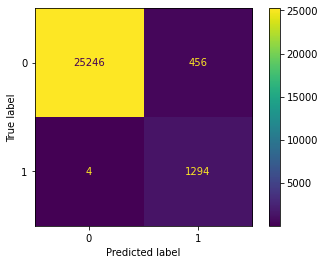

In [85]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_classifier.classes_)
disp.plot()

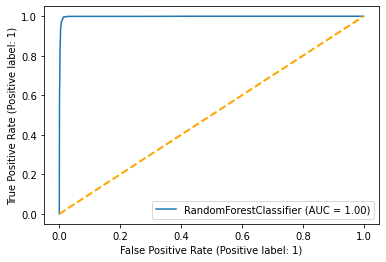

In [86]:
rfc_disp = RocCurveDisplay.from_estimator(rf_classifier, X_test, y_test)
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')